## Webscraping
### Desafio: captar dados para relatório de Staking
site = "https://www.stakingrewards.com/"

### Relatório - por Staking Market Cap

* Overview of the best Proof of Stake assets
* Based on real-time staking on-chain data


In [11]:
url_asset = f"https://beta.stakingrewards.com/assets/proof-of-stake?sort={report}&timeframe={tf}&order=desc&search="

#### Escolher o período

In [10]:
tf_list = ["7d", "30d", "90d", "1y"]
tf = tf_list[1]

#### Escolher o relatório

In [9]:
report_list = ["staking_marketcap", "reward_rate", ""]
report = report_list[0]

- via WebDriver by Selenium

In [14]:
import pandas as pd
import requests
from io import BytesIO
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

# Setup ChromeDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Executa o navegador em modo headless (sem exibir a janela)
driver = webdriver.Chrome(options=chrome_options)

# Load URL
url = "https://beta.stakingrewards.com/assets/proof-of-stake?sort=staking_marketcap&timeframe=7d&order=desc&search="

#"https://beta.stakingrewards.com/assets/proof-of-stake?sort=staking_marketcap&timeframe=7d&order=desc&search="
driver.get(url)

# Wait for the page to load (you may need to adjust the time depending on the page load time)
driver.implicitly_wait(30)

# Rows in table body
rows = driver.find_elements(By.CSS_SELECTOR, "table tbody tr")

data_list = []

try:
    # Wait for table
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "table tbody tr")))
     
    # Find tr elements in table
    tr_elements = driver.find_elements(By.CSS_SELECTOR, "table tbody tr")
    
    for row in tr_elements:
    #     logo_url = row.find_element(By.CSS_SELECTOR, "img").get_attribute("src")
    #     logo_image = requests.get(logo_url).content
        name = row.find_element(By.CSS_SELECTOR, "span.itemWithLogo_name__mNloS").text
        ticker = row.find_element(By.CSS_SELECTOR, "span.itemWithLogo_details__JEKKH").text

        columns = row.find_elements(By.CSS_SELECTOR, "div.assetMetricsRow_metric__kFy2b")
        price = columns[0].find_element(By.CSS_SELECTOR, "div.metricGroup_value__rnhk8").text
        price_7d_percentage = columns[0].find_element(By.CSS_SELECTOR, "div.metricGroup_percentage__1MP5q").text

        staking_market_cap = columns[1].find_element(By.CSS_SELECTOR, "div.metricGroup_value__rnhk8").text
        staking_market_cap_7d_percentage = columns[1].find_element(By.CSS_SELECTOR, "div.metricGroup_percentage__1MP5q").text

        staking_ratio = columns[2].find_element(By.CSS_SELECTOR, "div.metricGroup_value__rnhk8").text
        staking_ratio_7d_percentage = columns[2].find_element(By.CSS_SELECTOR, "div.metricGroup_percentage__1MP5q").text

        reward_rate = columns[3].find_element(By.CSS_SELECTOR, "div.metricGroup_value__rnhk8").text
        reward_rate_7d_percentage = columns[3].find_element(By.CSS_SELECTOR, "div.metricGroup_percentage__1MP5q").text

        rewards_per_year = columns[4].find_element(By.CSS_SELECTOR, "div.metricGroup_value__rnhk8").text
        rewards_per_year_7d_percentage = columns[4].find_element(By.CSS_SELECTOR, "div.metricGroup_percentage__1MP5q").text

        staking_flow_24h = columns[5].find_element(By.CSS_SELECTOR, "div.metricGroup_value__rnhk8").text

        # Append data to the list
        data_list.append({
    #         "logo_imagem": logo_image,
            "nome": name,
            "ticker": ticker,
            "preço": price,
            "30d%_preço": price_7d_percentage,
            "smc": staking_market_cap,
            "30d%_smc": staking_market_cap_7d_percentage,
            "staking_ratio": staking_ratio,
            "30d%_sr": staking_ratio_7d_percentage,
            "reward_rate": reward_rate,
            "30d%_rr": reward_rate_7d_percentage,
            "reward_year": rewards_per_year,
            "30d%_ry": rewards_per_year_7d_percentage,
            "$_flow": staking_flow_24h,
        })
except TimeoutException:
    print("Timeout: A página demorou muito para carregar ou não encontrou os elementos necessários.")

#finally:
driver.quit()

df = pd.DataFrame(data_list)

display(df)

,nome,ticker,preço,30d%_preço,smc,30d%_smc,staking_ratio,30d%_sr,reward_rate,30d%_rr,reward_year,30d%_ry,$_flow
0,Ethereum,ETH,"$1,825.25",-1.85%,$42b,+0.08%,18.75%,+0.35%,5.16%,+0.18%,$2.17b,+3.6%,+$177.69m
1,Solana,SOL,$22.93,-4.02%,$9.02b,-4.07%,70.62%,+1.16%,7.01%,-0.17%,$632.21m,-6.48%,+$23.35m
2,Cardano,ADA,$0.288799,-7.09%,$6.56b,-7.09%,62.18%,-0.33%,3.1%,-0.01%,$202.86m,-7.54%,-$8.39m
3,Aptos,APT,$6.61,-6.24%,$5.95b,-5.23%,84.95%,-0.06%,6.36%,-0.1%,$369.96m,-5.64%,-$3.54m
4,BNB Chain,BNB,$241.65,-0.26%,$5.49b,-0.62%,14.76%,-0.01%,2.09%,-0.03%,$114.61m,-2.72%,+$43.33k
5,Sui,SUI,$0.577515,-7.84%,$4.37b,-5.3%,74.15%,+0.03%,4.41%,~ +0%,$192.89m,-5.27%,+$2.58m
6,Avalanche,AVAX,$12.46,-3.56%,$3.42b,-3.46%,62.3%,-0.16%,7.43%,~ +0%,$254.27m,-3.36%,-$5.26m
7,Tron,TRX,$0.076622,-1.84%,$3.27b,-1.96%,47.63%,-0.02%,3.48%,~ +0%,$113.46m,-1.87%,-$5.03m
8,Polkadot,DOT,$4.95,-3.32%,$3.01b,-1.63%,44.91%,+0.63%,14.6%,-0.07%,$432.97m,-2.65%,-$266.05k
9,Polygon,MATIC,$0.661561,-4.31%,$2.44b,-3.71%,38.83%,+0.16%,4.96%,-0.08%,$120.76m,-2.47%,+$533.93k


===============================

In [20]:
df.to_excel("dados_staking_smc.xlsx", index=False)
print("Dados salvos com sucesso em 'dados_staking_smc.xlsx'.")

Dados salvos com sucesso em 'dados_staking_smc.xlsx'.


### Excel

In [15]:
from datetime import datetime
data_atual = datetime.today().strftime('%B%Y') 
nome_arquivo = f"dados_staking_smc_{data_atual}.xlsx" # mês atual no nome do arquivo
df.to_excel(nome_arquivo, index=False)
print(f"Dados salvos com sucesso em '{nome_arquivo}'.")

Dados salvos com sucesso em 'dados_staking_smc_August2023.xlsx'.


### CSV

In [17]:
data_atual = datetime.today().strftime('%B%Y') 
nome_arquivo = f"dados_staking_smc_{data_atual}.csv" # mês atual no nome do arquivo
df.to_csv(nome_arquivo, index=False)
print(f"Dados salvos com sucesso em '{nome_arquivo}'.")

Dados salvos com sucesso em 'dados_staking_smc_August2023.csv'.


### TOP 10 Staking Market Cap

In [19]:
df_top10 = df.head(10).drop(
    columns=[
    'staking_ratio', 
    '30d%_sr', 
    'reward_rate', 
    '30d%_rr', 
    'reward_year', 
    '30d%_ry', 
    '$_flow'
])
display(df_top10)

,nome,ticker,preço,30d%_preço,smc,30d%_smc
0,Ethereum,ETH,"$1,825.25",-1.85%,$42b,+0.08%
1,Solana,SOL,$22.93,-4.02%,$9.02b,-4.07%
2,Cardano,ADA,$0.288799,-7.09%,$6.56b,-7.09%
3,Aptos,APT,$6.61,-6.24%,$5.95b,-5.23%
4,BNB Chain,BNB,$241.65,-0.26%,$5.49b,-0.62%
5,Sui,SUI,$0.577515,-7.84%,$4.37b,-5.3%
6,Avalanche,AVAX,$12.46,-3.56%,$3.42b,-3.46%
7,Tron,TRX,$0.076622,-1.84%,$3.27b,-1.96%
8,Polkadot,DOT,$4.95,-3.32%,$3.01b,-1.63%
9,Polygon,MATIC,$0.661561,-4.31%,$2.44b,-3.71%


In [37]:
df = pd.read_excel("dados_staking_smc.xlsx")

In [38]:
# Análise Exploratória de Dados
numeric_columns = df.columns[3:15]
numeric_summary = df[numeric_columns].describe()
correlation_matrix = df.corr()

print("Estatísticas Descritivas:")
print(numeric_summary)

print("\nMatriz de Correlação:")
print(correlation_matrix)

Estatísticas Descritivas:
        inflação   30d%_inf
count  20.000000  20.000000
mean    0.077175  -0.012050
std     0.122343   0.032511
min    -0.056600  -0.114200
25%     0.019400   0.000000
50%     0.059700   0.000350
75%     0.079725   0.000900
max     0.487500   0.011900

Matriz de Correlação:
          inflação  30d%_inf
inflação  1.000000 -0.438007
30d%_inf -0.438007  1.000000


C:\Users\OPTIPLEX 390\AppData\Local\Temp\ipykernel_11388\958141596.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


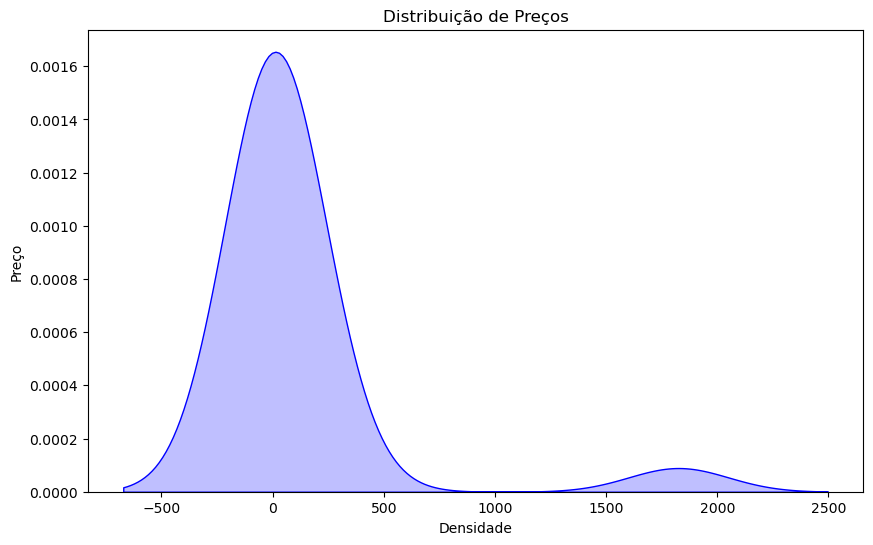

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Converter a coluna de preço para valores numéricos
df["preço"] = df["preço"].str.replace('[\$,]', '', regex=True).astype(float)

# Distribuição de Preços
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="preço", color='blue', fill=True)
plt.xlabel("Densidade")
plt.ylabel("Preço")
plt.title("Distribuição de Preços")
plt.show()


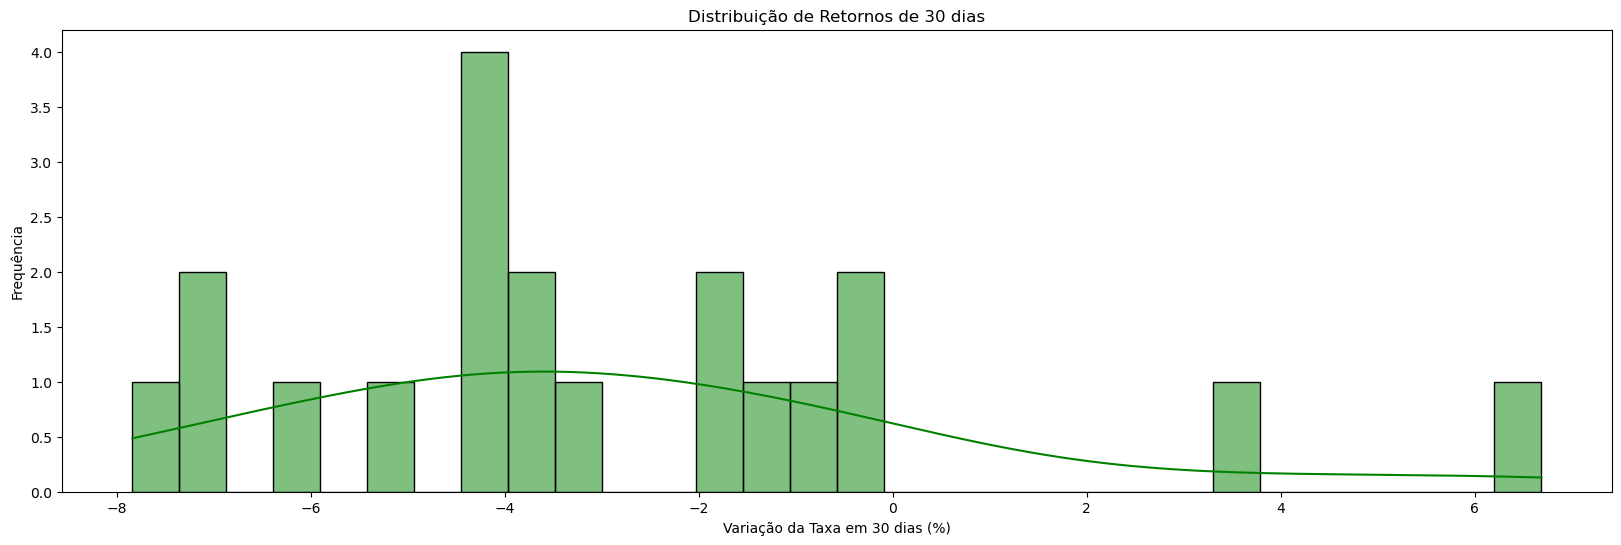

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregando os dados a partir do arquivo Excel
df = pd.read_excel("dados_staking_smc.xlsx")

# Converter a coluna "30d%_preço" para valores numéricos
df["30d%_preço"] = df["30d%_preço"].str.replace('%', '', regex=True).astype(float)

# Distribuição de Retornos de 30 dias
plt.figure(figsize=(20, 6))
sns.histplot(df["30d%_preço"], bins=30, kde=True, color='green')
plt.ylabel("Frequência")
plt.xlabel("Variação da Taxa em 30 dias (%)")
plt.title("Distribuição de Retornos de 30 dias")
plt.show()


In [95]:
import pandas as pd

# Carregando os dados a partir do arquivo Excel
df = pd.read_excel("dados_staking_smc.xlsx")

# Converter colunas relevantes para valores numéricos
numeric_columns = ["preço", "30d%_preço", "smc", "30d%_smc", "staking_ratio", "30d%_sr", 
                   "reward_rate", "30d%_rr", "reward_year", "30d%_ry", "$_flow", "inflação", "30d%_inf"]

def convert_to_numeric(value):
    try:
        if value.endswith('m'):
            return float(value[:-1]) * 1e6
        elif value.endswith('b'):
            return float(value[:-1]) * 1e9
        else:
            return float(value)
    except:
        return None

for col in numeric_columns:
    df[col] = df[col].apply(convert_to_numeric)

# Análise de Cruzamento de Dados para Identificação do Melhor Investimento
weights = {
    "reward_year": 0.1,
    "reward_rate": 0.3,
    "staking_ratio": 0.1,
    "inflação": -0.4
}

def calculate_composite_score(row):
    score = 0
    for metric, weight in weights.items():
        value = row[metric]
        if pd.notnull(value):  # Verificar se o valor não é nulo
            score += value * weight
    return score

df["composite_score"] = df.apply(calculate_composite_score, axis=1)

df_ranked = df.sort_values(by="composite_score", ascending=False)
top_investments = df_ranked.head(10)

print("\nTop 3 Melhores Investimentos:")
print("")
print(top_investments[["nome", "ticker", "composite_score"]])



Top 3 Melhores Investimentos:

                            nome ticker  composite_score
0                       Ethereum    ETH                0
1                         Solana    SOL                0
18                Casper Network   CSPR                0
17                        Cronos    CRO                0
16                          Flow   FLOW                0
15                          Mina   MINA                0
14  MultiversX (Formerly Elrond)   eGLD                0
13                         Tezos    XTZ                0
12             Internet Computer    ICP                0
11                        Hedera   HBAR                0


#### Pegar os links das moedas

In [33]:
import pandas as pd
import requests
from io import BytesIO
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

# Setup ChromeDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Executa o navegador em modo headless (sem exibir a janela)
driver = webdriver.Chrome(options=chrome_options)

# Load URL
url = "https://beta.stakingrewards.com/assets/proof-of-stake?sort=staking_marketcap&timeframe=7d&order=desc&search="

#"https://beta.stakingrewards.com/assets/proof-of-stake?sort=staking_marketcap&timeframe=7d&order=desc&search="
driver.get(url)

# Wait for the page to load (you may need to adjust the time depending on the page load time)
driver.implicitly_wait(30)

# Rows in table body
rows = driver.find_elements(By.CSS_SELECTOR, "table tbody tr")

data_list = []

try:
    # Wait for table
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "table tbody tr")))
     

    # Find tr elements in table and get the links
    for row in rows:
        link_element = row.find_element(By.CSS_SELECTOR, "a")
        link = link_element.get_attribute("href")
        data_list.append(link)
except TimeoutException:
    print("Table not found or took too long to load.")

# Close the ChromeDriver
driver.quit()

display(data_list)

['https://beta.stakingrewards.com/asset/ethereum-2-0',
 'https://beta.stakingrewards.com/asset/solana',
 'https://beta.stakingrewards.com/asset/cardano',
 'https://beta.stakingrewards.com/asset/binance-smart-chain',
 'https://beta.stakingrewards.com/asset/sui',
 'https://beta.stakingrewards.com/asset/avalanche',
 'https://beta.stakingrewards.com/asset/tron',
 'https://beta.stakingrewards.com/asset/polkadot',
 'https://beta.stakingrewards.com/asset/matic-network',
 'https://beta.stakingrewards.com/asset/cosmos',
 'https://beta.stakingrewards.com/asset/hedera-hashgraph',
 'https://beta.stakingrewards.com/asset/dfinity',
 'https://beta.stakingrewards.com/asset/near-protocol',
 'https://beta.stakingrewards.com/asset/tezos',
 'https://beta.stakingrewards.com/asset/elrond',
 'https://beta.stakingrewards.com/asset/mina',
 'https://beta.stakingrewards.com/asset/flow',
 'https://beta.stakingrewards.com/asset/crypto-com-coin',
 'https://beta.stakingrewards.com/asset/casper-network',
 'https://be